# Results Analysis Part 2

In [1]:
from packages import * 
from func import * 
import glob

plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [2]:
# Load Folder

os.chdir('realizations/net_realization_1')
file_list = glob.glob("*.csv")
os.chdir('../')
os.chdir('../')

path = "realizations_combined/"
if not os.path.exists(path):
    os.mkdir(path)

for j in file_list:
    all_filenames = []
    for i in range(2):
        all_filenames.append('realizations/net_realization_'+ str(i+1)+"/"+j)
    combined_csv = pd.concat([pd.read_csv(f, header = None) for f in all_filenames])
    
    combined_csv.to_csv(path+j, header = None, encoding='utf-8-sig')

## Plot Results - Young

In [3]:
df_A_phi0 = pd.read_csv(path+"results_betaA_phi0_Y.csv", header = None)
df_B_phi0 = pd.read_csv(path+"results_betaB_phi0_Y.csv", header = None)
df_A_phi2 = pd.read_csv(path+"results_betaA_phi2_Y.csv", header = None)
df_B_phi2 = pd.read_csv(path+"results_betaB_phi2_Y.csv", header = None)
df_A_phi4 = pd.read_csv(path+"results_betaA_phi4_Y.csv", header = None)
df_B_phi4 = pd.read_csv(path+"results_betaB_phi4_Y.csv", header = None)

df_A_phi0.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi0.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_phi2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_phi4.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi4.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 

df_A_b2 = pd.read_csv(path+"results_betaA_b2_Y.csv", header = None)
df_B_b2 = pd.read_csv(path+"results_betaB_b2_Y.csv", header = None)
df_A_b5 = pd.read_csv(path+"results_betaA_b5_Y.csv", header = None)
df_B_b5 = pd.read_csv(path+"results_betaB_b5_Y.csv", header = None)
df_A_b8 = pd.read_csv(path+"results_betaA_b8_Y.csv", header = None)
df_B_b8 = pd.read_csv(path+"results_betaB_b8_Y.csv", header = None)

df_A_b2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_b5.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b5.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_b8.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b8.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 

In [4]:
df_A_phi0 = df_A_phi0.groupby(['index']).mean()
df_B_phi0 = df_B_phi0.groupby(['index']).mean()
df_A_phi2 = df_A_phi2.groupby(['index']).mean()
df_B_phi2 = df_B_phi2.groupby(['index']).mean()
df_A_phi4 = df_A_phi4.groupby(['index']).mean()
df_B_phi4 = df_B_phi4.groupby(['index']).mean()
df_A_b2   =   df_A_b2.groupby(['index']).mean()  
df_B_b2   =   df_B_b2.groupby(['index']).mean()  
df_A_b5   =   df_A_b5.groupby(['index']).mean()  
df_B_b5   =   df_B_b5.groupby(['index']).mean()  
df_A_b8   =   df_A_b8.groupby(['index']).mean()  
df_B_b8   =   df_B_b8.groupby(['index']).mean()  

### Fig 3

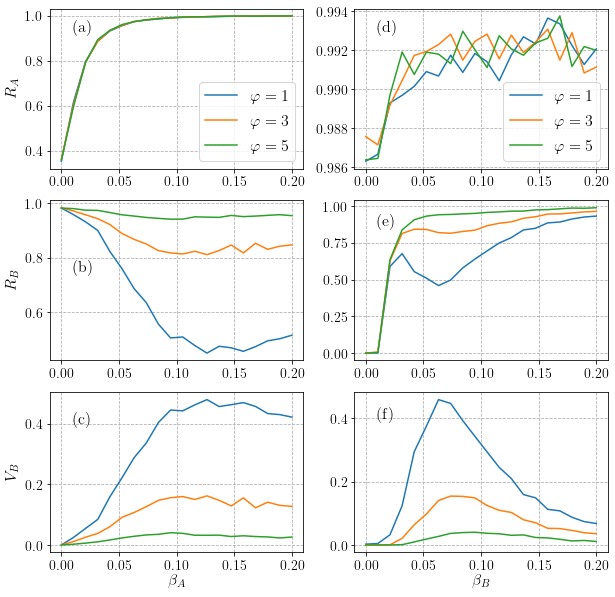

In [5]:
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols, figsize=(10,10))

ax[0,0].plot(df_A_phi0["betaA"], df_A_phi0["RA"], label = r"$\varphi = 1$")
ax[0,0].plot(df_A_phi2["betaA"], df_A_phi2["RA"], label = r"$\varphi = 3$")
ax[0,0].plot(df_A_phi4["betaA"], df_A_phi4["RA"], label = r"$\varphi = 5$")

ax[1,0].plot(df_A_phi0["betaA"], df_A_phi0["RB"], label = r"$\varphi = 1$")
ax[1,0].plot(df_A_phi2["betaA"], df_A_phi2["RB"], label = r"$\varphi = 3$")
ax[1,0].plot(df_A_phi4["betaA"], df_A_phi4["RB"], label = r"$\varphi = 5$")

ax[2,0].plot(df_A_phi0["betaA"], df_A_phi0["VB"], label = r"$\varphi = 1$")
ax[2,0].plot(df_A_phi2["betaA"], df_A_phi2["VB"], label = r"$\varphi = 3$")
ax[2,0].plot(df_A_phi4["betaA"], df_A_phi4["VB"], label = r"$\varphi = 5$")

ax[0,1].plot(df_B_phi0["betaB"], df_B_phi0["RA"], label = r"$\varphi = 1$")
ax[0,1].plot(df_B_phi2["betaB"], df_B_phi2["RA"], label = r"$\varphi = 3$")
ax[0,1].plot(df_B_phi4["betaB"], df_B_phi4["RA"], label = r"$\varphi = 5$")

ax[1,1].plot(df_B_phi0["betaB"], df_B_phi0["RB"], label = r"$\varphi = 1$")
ax[1,1].plot(df_B_phi2["betaB"], df_B_phi2["RB"], label = r"$\varphi = 3$")
ax[1,1].plot(df_B_phi4["betaB"], df_B_phi4["RB"], label = r"$\varphi = 5$")

ax[2,1].plot(df_B_phi0["betaB"], df_B_phi0["VB"], label = r"$\varphi = 1$")
ax[2,1].plot(df_B_phi2["betaB"], df_B_phi2["VB"], label = r"$\varphi = 3$")
ax[2,1].plot(df_B_phi4["betaB"], df_B_phi4["VB"], label = r"$\varphi = 5$")

ax[0,0].grid(linestyle='--')
ax[1,0].grid(linestyle='--') 
ax[2,0].grid(linestyle='--')
ax[0,1].grid(linestyle='--')
ax[1,1].grid(linestyle='--') 
ax[2,1].grid(linestyle='--')

ax[0,0].legend(fontsize = 16)
ax[0,1].legend(fontsize = 16)

ax[2,0].set_xlabel(r"$\beta_A$", fontsize = 16)
ax[2,1].set_xlabel(r"$\beta_B$", fontsize = 16)

ax[0,0].set_ylabel(r"$R_A$", fontsize = 16)
ax[1,0].set_ylabel(r"$R_B$", fontsize = 16)
ax[2,0].set_ylabel(r"$V_B$", fontsize = 16)

ax[0,0].text(x = 0.01, y = 0.93, s = "(a)", fontsize = 16)
ax[1,0].text(x = 0.01, y = 0.75, s = "(b)", fontsize = 16)
ax[2,0].text(x = 0.01, y = 0.40, s = "(c)", fontsize = 16)
ax[0,1].text(x = 0.01, y = 0.993, s = "(d)", fontsize = 16)
ax[1,1].text(x = 0.01, y = 0.87, s = "(e)", fontsize = 16)
ax[2,1].text(x = 0.01, y = 0.40, s = "(f)", fontsize = 16)

ax[0,0].tick_params(axis="both", labelsize=14)
ax[1,0].tick_params(axis="both", labelsize=14)
ax[2,0].tick_params(axis="both", labelsize=14)
ax[0,1].tick_params(axis="both", labelsize=14)
ax[1,1].tick_params(axis="both", labelsize=14)
ax[2,1].tick_params(axis="both", labelsize=14)

plt.savefig("Fig3_Y.pdf", bbox_inches='tight')

plt.show()

### Fig 4

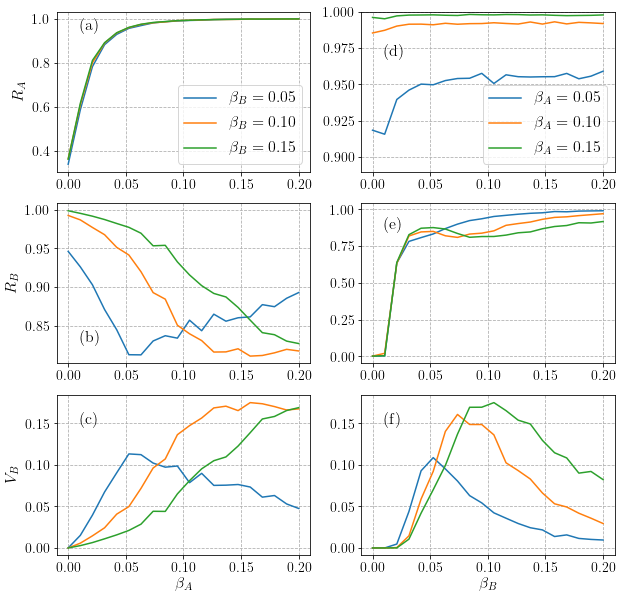

In [6]:
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols, figsize=(10,10))

ax[0,0].plot(df_A_b2["betaA"], df_A_b2["RA"], label = r"$\beta_B = 0.05$")
ax[0,0].plot(df_A_b5["betaA"], df_A_b5["RA"], label = r"$\beta_B = 0.10$")
ax[0,0].plot(df_A_b8["betaA"], df_A_b8["RA"], label = r"$\beta_B = 0.15$")

ax[1,0].plot(df_A_b2["betaA"], df_A_b2["RB"], label = r"$\beta_B = 0.05$")
ax[1,0].plot(df_A_b5["betaA"], df_A_b5["RB"], label = r"$\beta_B = 0.10$")
ax[1,0].plot(df_A_b8["betaA"], df_A_b8["RB"], label = r"$\beta_B = 0.15$")

ax[2,0].plot(df_A_b2["betaA"], df_A_b2["VB"], label = r"$\beta_B = 0.05$")
ax[2,0].plot(df_A_b5["betaA"], df_A_b5["VB"], label = r"$\beta_B = 0.10$")
ax[2,0].plot(df_A_b8["betaA"], df_A_b8["VB"], label = r"$\beta_B = 0.15$")

ax[0,1].plot(df_B_b2["betaB"], df_B_b2["RA"], label = r"$\beta_A = 0.05$")
ax[0,1].plot(df_B_b5["betaB"], df_B_b5["RA"], label = r"$\beta_A = 0.10$")
ax[0,1].plot(df_B_b8["betaB"], df_B_b8["RA"], label = r"$\beta_A = 0.15$")

ax[1,1].plot(df_B_b2["betaB"], df_B_b2["RB"], label = r"$\beta_A = 0.05$")
ax[1,1].plot(df_B_b5["betaB"], df_B_b5["RB"], label = r"$\beta_A = 0.10$")
ax[1,1].plot(df_B_b8["betaB"], df_B_b8["RB"], label = r"$\beta_A = 0.15$")

ax[2,1].plot(df_B_b2["betaB"], df_B_b2["VB"], label = r"$\beta_A = 0.05$")
ax[2,1].plot(df_B_b5["betaB"], df_B_b5["VB"], label = r"$\beta_A = 0.10$")
ax[2,1].plot(df_B_b8["betaB"], df_B_b8["VB"], label = r"$\beta_A = 0.15$")

ax[0,1].set_ylim(0.89,1)

ax[0,0].grid(linestyle='--')
ax[1,0].grid(linestyle='--') 
ax[2,0].grid(linestyle='--')
ax[0,1].grid(linestyle='--')
ax[1,1].grid(linestyle='--') 
ax[2,1].grid(linestyle='--')

ax[0,0].legend(fontsize=16)
ax[0,1].legend(fontsize=16, loc="lower right")

ax[2,0].set_xlabel(r"$\beta_A$", fontsize = 16)
ax[2,1].set_xlabel(r"$\beta_B$", fontsize = 16)

ax[0,0].set_ylabel(r"$R_A$", fontsize = 16)
ax[1,0].set_ylabel(r"$R_B$", fontsize = 16)
ax[2,0].set_ylabel(r"$V_B$", fontsize = 16)

ax[0,0].text(x = 0.01, y = 0.95, s = "(a)", fontsize = 16)
ax[1,0].text(x = 0.01, y = 0.83, s = "(b)", fontsize = 16)
ax[2,0].text(x = 0.01, y = 0.15, s = "(c)", fontsize = 16)
ax[0,1].text(x = 0.01, y = 0.97, s = "(d)", fontsize = 16)
ax[1,1].text(x = 0.01, y = 0.87, s = "(e)", fontsize = 16)
ax[2,1].text(x = 0.01, y = 0.15, s = "(f)", fontsize = 16)

ax[0,0].tick_params(axis="both", labelsize=14)
ax[1,0].tick_params(axis="both", labelsize=14)
ax[2,0].tick_params(axis="both", labelsize=14)
ax[0,1].tick_params(axis="both", labelsize=14)
ax[1,1].tick_params(axis="both", labelsize=14)
ax[2,1].tick_params(axis="both", labelsize=14)

plt.savefig("Fig4_Y.pdf", bbox_inches='tight')

plt.show()

### Beta min

In [7]:
betaA_min_Y = df_A_phi2.loc[df_A_phi2['RB'] == df_A_phi2['RB'].min(), 'betaA'].tolist()

print(betaA_min_Y[0])

0.1263157894736842


## Plot Results - Old

In [6]:
df_A_phi0 = pd.read_csv(path+"results_betaA_phi0_O.csv", header = None)
df_B_phi0 = pd.read_csv(path+"results_betaB_phi0_O.csv", header = None)
df_A_phi2 = pd.read_csv(path+"results_betaA_phi2_O.csv", header = None)
df_B_phi2 = pd.read_csv(path+"results_betaB_phi2_O.csv", header = None)
df_A_phi4 = pd.read_csv(path+"results_betaA_phi4_O.csv", header = None)
df_B_phi4 = pd.read_csv(path+"results_betaB_phi4_O.csv", header = None)

df_A_phi0.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi0.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_phi2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_phi4.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_phi4.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 

df_A_b2 = pd.read_csv(path+"results_betaA_b2_O.csv", header = None)
df_B_b2 = pd.read_csv(path+"results_betaB_b2_O.csv", header = None)
df_A_b5 = pd.read_csv(path+"results_betaA_b5_O.csv", header = None)
df_B_b5 = pd.read_csv(path+"results_betaB_b5_O.csv", header = None)
df_A_b8 = pd.read_csv(path+"results_betaA_b8_O.csv", header = None)
df_B_b8 = pd.read_csv(path+"results_betaB_b8_O.csv", header = None)

df_A_b2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b2.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_b5.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b5.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_A_b8.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 
df_B_b8.columns = ["index", "betaA", "betaB", "RA", "RB", "VB"] 

In [7]:
df_A_phi0 = df_A_phi0.groupby(['index']).mean()
df_B_phi0 = df_B_phi0.groupby(['index']).mean()
df_A_phi2 = df_A_phi2.groupby(['index']).mean()
df_B_phi2 = df_B_phi2.groupby(['index']).mean()
df_A_phi4 = df_A_phi4.groupby(['index']).mean()
df_B_phi4 = df_B_phi4.groupby(['index']).mean()
df_A_b2   =   df_A_b2.groupby(['index']).mean()  
df_B_b2   =   df_B_b2.groupby(['index']).mean()  
df_A_b5   =   df_A_b5.groupby(['index']).mean()  
df_B_b5   =   df_B_b5.groupby(['index']).mean()  
df_A_b8   =   df_A_b8.groupby(['index']).mean()  
df_B_b8   =   df_B_b8.groupby(['index']).mean()  

### Fig 3

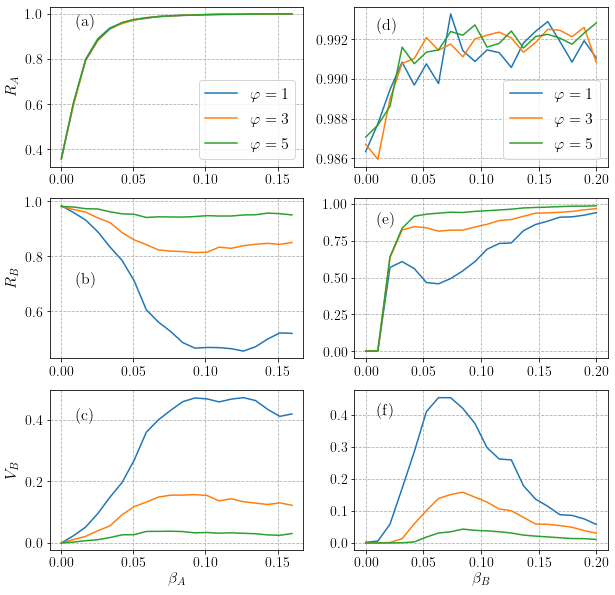

In [9]:
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols, figsize=(10,10))

ax[0,0].plot(0.8*df_A_phi0["betaA"], df_A_phi0["RA"], label = r"$\varphi = 1$")
ax[0,0].plot(0.8*df_A_phi2["betaA"], df_A_phi2["RA"], label = r"$\varphi = 3$")
ax[0,0].plot(0.8*df_A_phi4["betaA"], df_A_phi4["RA"], label = r"$\varphi = 5$")

ax[1,0].plot(0.8*df_A_phi0["betaA"], df_A_phi0["RB"], label = r"$\varphi = 1$")
ax[1,0].plot(0.8*df_A_phi2["betaA"], df_A_phi2["RB"], label = r"$\varphi = 3$")
ax[1,0].plot(0.8*df_A_phi4["betaA"], df_A_phi4["RB"], label = r"$\varphi = 5$")

ax[2,0].plot(0.8*df_A_phi0["betaA"], df_A_phi0["VB"], label = r"$\varphi = 1$")
ax[2,0].plot(0.8*df_A_phi2["betaA"], df_A_phi2["VB"], label = r"$\varphi = 3$")
ax[2,0].plot(0.8*df_A_phi4["betaA"], df_A_phi4["VB"], label = r"$\varphi = 5$")

ax[0,1].plot(df_B_phi0["betaB"], df_B_phi0["RA"], label = r"$\varphi = 1$")
ax[0,1].plot(df_B_phi2["betaB"], df_B_phi2["RA"], label = r"$\varphi = 3$")
ax[0,1].plot(df_B_phi4["betaB"], df_B_phi4["RA"], label = r"$\varphi = 5$")

ax[1,1].plot(df_B_phi0["betaB"], df_B_phi0["RB"], label = r"$\varphi = 1$")
ax[1,1].plot(df_B_phi2["betaB"], df_B_phi2["RB"], label = r"$\varphi = 3$")
ax[1,1].plot(df_B_phi4["betaB"], df_B_phi4["RB"], label = r"$\varphi = 5$")

ax[2,1].plot(df_B_phi0["betaB"], df_B_phi0["VB"], label = r"$\varphi = 1$")
ax[2,1].plot(df_B_phi2["betaB"], df_B_phi2["VB"], label = r"$\varphi = 3$")
ax[2,1].plot(df_B_phi4["betaB"], df_B_phi4["VB"], label = r"$\varphi = 5$")

ax[0,0].grid(linestyle='--')
ax[1,0].grid(linestyle='--') 
ax[2,0].grid(linestyle='--')
ax[0,1].grid(linestyle='--')
ax[1,1].grid(linestyle='--') 
ax[2,1].grid(linestyle='--')

ax[0,0].legend(fontsize = 16)
ax[0,1].legend(fontsize = 16)

ax[2,0].set_xlabel(r"$\beta_A$", fontsize = 16)
ax[2,1].set_xlabel(r"$\beta_B$", fontsize = 16)

ax[0,0].set_ylabel(r"$R_A$", fontsize = 16)
ax[1,0].set_ylabel(r"$R_B$", fontsize = 16)
ax[2,0].set_ylabel(r"$V_B$", fontsize = 16)

ax[0,0].text(x = 0.01, y = 0.95, s = "(a)", fontsize = 16)
ax[1,0].text(x = 0.01, y = 0.70, s = "(b)", fontsize = 16)
ax[2,0].text(x = 0.01, y = 0.40, s = "(c)", fontsize = 16)
ax[0,1].text(x = 0.01, y = 0.9925, s = "(d)", fontsize = 16)
ax[1,1].text(x = 0.01, y = 0.87, s = "(e)", fontsize = 16)
ax[2,1].text(x = 0.01, y = 0.40, s = "(f)", fontsize = 16)

ax[0,0].tick_params(axis="both", labelsize=14)
ax[1,0].tick_params(axis="both", labelsize=14)
ax[2,0].tick_params(axis="both", labelsize=14)
ax[0,1].tick_params(axis="both", labelsize=14)
ax[1,1].tick_params(axis="both", labelsize=14)
ax[2,1].tick_params(axis="both", labelsize=14)

plt.savefig("Fig3_O.pdf", bbox_inches='tight')

plt.show()

### Fig 4

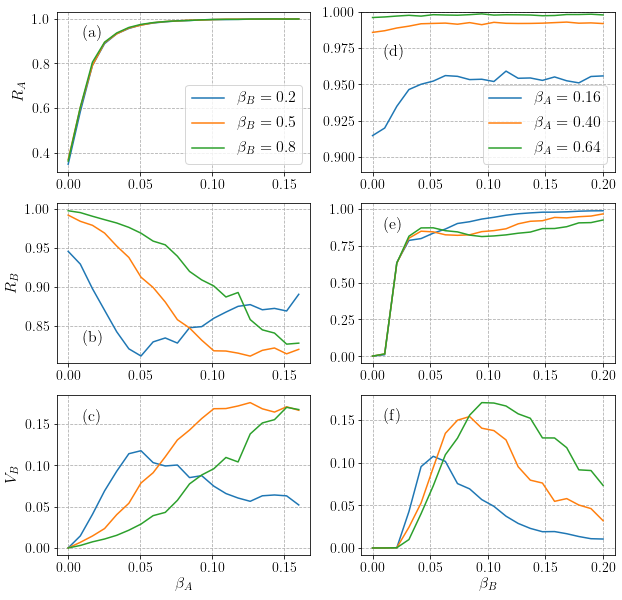

In [11]:
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols, figsize=(10,10))

ax[0,0].plot(0.8*df_A_b2["betaA"], df_A_b2["RA"], label = r"$\beta_B = 0.2$")
ax[0,0].plot(0.8*df_A_b5["betaA"], df_A_b5["RA"], label = r"$\beta_B = 0.5$")
ax[0,0].plot(0.8*df_A_b8["betaA"], df_A_b8["RA"], label = r"$\beta_B = 0.8$")

ax[1,0].plot(0.8*df_A_b2["betaA"], df_A_b2["RB"], label = r"$\beta_B = 0.2$")
ax[1,0].plot(0.8*df_A_b5["betaA"], df_A_b5["RB"], label = r"$\beta_B = 0.5$")
ax[1,0].plot(0.8*df_A_b8["betaA"], df_A_b8["RB"], label = r"$\beta_B = 0.8$")

ax[2,0].plot(0.8*df_A_b2["betaA"], df_A_b2["VB"], label = r"$\beta_B = 0.2$")
ax[2,0].plot(0.8*df_A_b5["betaA"], df_A_b5["VB"], label = r"$\beta_B = 0.5$")
ax[2,0].plot(0.8*df_A_b8["betaA"], df_A_b8["VB"], label = r"$\beta_B = 0.8$")

ax[0,1].plot(df_B_b2["betaB"], df_B_b2["RA"], label = r"$\beta_A = 0.16$")
ax[0,1].plot(df_B_b5["betaB"], df_B_b5["RA"], label = r"$\beta_A = 0.40$")
ax[0,1].plot(df_B_b8["betaB"], df_B_b8["RA"], label = r"$\beta_A = 0.64$")

ax[1,1].plot(df_B_b2["betaB"], df_B_b2["RB"], label = r"$\beta_A = 0.16$")
ax[1,1].plot(df_B_b5["betaB"], df_B_b5["RB"], label = r"$\beta_A = 0.40$")
ax[1,1].plot(df_B_b8["betaB"], df_B_b8["RB"], label = r"$\beta_A = 0.64$")

ax[2,1].plot(df_B_b2["betaB"], df_B_b2["VB"], label = r"$\beta_A = 0.16$")
ax[2,1].plot(df_B_b5["betaB"], df_B_b5["VB"], label = r"$\beta_A = 0.40$")
ax[2,1].plot(df_B_b8["betaB"], df_B_b8["VB"], label = r"$\beta_A = 0.64$")

ax[0,1].set_ylim(0.89,1)

ax[0,0].grid(linestyle='--')
ax[1,0].grid(linestyle='--') 
ax[2,0].grid(linestyle='--')
ax[0,1].grid(linestyle='--')
ax[1,1].grid(linestyle='--') 
ax[2,1].grid(linestyle='--')

ax[0,0].legend(fontsize = 16)
ax[0,1].legend(fontsize = 16, loc="lower right")

ax[2,0].set_xlabel(r"$\beta_A$", fontsize = 16)
ax[2,1].set_xlabel(r"$\beta_B$", fontsize = 16)

ax[0,0].set_ylabel(r"$R_A$", fontsize = 16)
ax[1,0].set_ylabel(r"$R_B$", fontsize = 16)
ax[2,0].set_ylabel(r"$V_B$", fontsize = 16)

ax[0,0].text(x = 0.01, y = 0.92, s = "(a)", fontsize = 16)
ax[1,0].text(x = 0.01, y = 0.83, s = "(b)", fontsize = 16)
ax[2,0].text(x = 0.01, y = 0.155, s = "(c)", fontsize = 16)
ax[0,1].text(x = 0.01, y = 0.97, s = "(d)", fontsize = 16)
ax[1,1].text(x = 0.01, y = 0.87, s = "(e)", fontsize = 16)
ax[2,1].text(x = 0.01, y = 0.15, s = "(f)", fontsize = 16)

ax[0,0].tick_params(axis="both", labelsize=14)
ax[1,0].tick_params(axis="both", labelsize=14)
ax[2,0].tick_params(axis="both", labelsize=14)
ax[0,1].tick_params(axis="both", labelsize=14)
ax[1,1].tick_params(axis="both", labelsize=14)
ax[2,1].tick_params(axis="both", labelsize=14)

plt.savefig("Fig4_O.pdf", bbox_inches='tight')

plt.show()

### Fig. 6 

In [12]:
betaA_min_O = df_A_phi2.loc[df_A_phi2['RB'] == df_A_phi2['RB'].min(), 'betaA'].tolist()

print(betaA_min_O[0])

0.11578947368421053


## Fig 6 Y + O

In [13]:
# Run Fig 6
N, GA, GB, betaA, gammaA, betaB, gammaB, phi, p, t_max, niter, prop_Y = init() 

In [14]:
betaA_min_Y = 0.1263157894736842
betaA_min_O = 0.11578947368421053

In [15]:
res5_Y = propagator_AB("c", GA, GB, betaA_min_Y-0.05, gammaA, 0.075, gammaB, 2, p, t_max, prop_Y)
res7_Y = propagator_AB("c", GA, GB, betaA_min_Y, gammaA, 0.075, gammaB, 2, p, t_max, prop_Y)
res9_Y = propagator_AB("c", GA, GB, betaA_min_Y+0.05, gammaA, 0.075, gammaB, 2, p, t_max, prop_Y)

res5_O = propagator_AB("c", GA, GB, betaA_min_O-0.05, gammaA, 0.075, gammaB, 2, p, t_max, prop_Y)
res7_O = propagator_AB("c", GA, GB, betaA_min_O, gammaA, 0.075, gammaB, 2, p, t_max, prop_Y)
res9_O = propagator_AB("c", GA, GB, betaA_min_O+0.05, gammaA, 0.075, gammaB, 2, p, t_max, prop_Y)

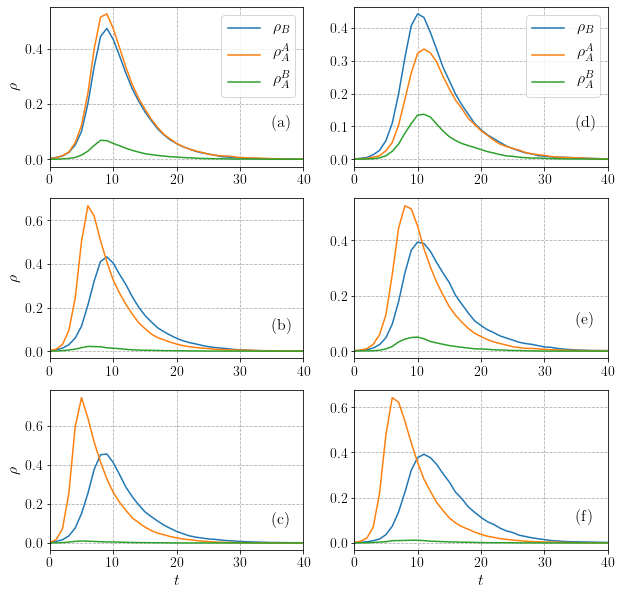

In [16]:
rows, cols = 3, 2
fig, ax = plt.subplots(rows, cols, figsize=(10,10))

t = [i for i in range(len(res5_Y[1][0]))]

ax[0,0].plot(t, res5_Y[0][0], label = r"$\rho_{B}$")
ax[0,0].plot(t, res5_Y[0][1], label = r"$\rho_{A}^{A}$")
ax[0,0].plot(t, res5_Y[0][2], label = r"$\rho_{A}^{B}$")

ax[1,0].plot(t, res7_Y[0][0], label = r"$\rho_{B}$")
ax[1,0].plot(t, res7_Y[0][1], label = r"$\rho_{A}^{A}$")
ax[1,0].plot(t, res7_Y[0][2], label = r"$\rho_{A}^{B}$")

ax[2,0].plot(t, res9_Y[0][0], label = r"$\rho_{B}$")
ax[2,0].plot(t, res9_Y[0][1], label = r"$\rho_{A}^{A}$")
ax[2,0].plot(t, res9_Y[0][2], label = r"$\rho_{A}^{B}$")

ax[0,0].set_xlim(0,40)
ax[1,0].set_xlim(0,40)
ax[2,0].set_xlim(0,40)

ax[0,0].grid(linestyle='--')
ax[1,0].grid(linestyle='--') 
ax[2,0].grid(linestyle='--')

ax[0,0].legend(fontsize = 16)

ax[2,0].set_xlabel(r"$t$", fontsize = 16)

ax[0,0].set_ylabel(r"$\rho$", fontsize = 16)
ax[1,0].set_ylabel(r"$\rho$", fontsize = 16)
ax[2,0].set_ylabel(r"$\rho$", fontsize = 16)

# -----

ax[0,1].plot(t, res5_O[1][0], label = r"$\rho_{B}$")
ax[0,1].plot(t, res5_O[1][1], label = r"$\rho_{A}^{A}$")
ax[0,1].plot(t, res5_O[1][2], label = r"$\rho_{A}^{B}$")

ax[1,1].plot(t, res7_O[1][0], label = r"$\rho_{B}$")
ax[1,1].plot(t, res7_O[1][1], label = r"$\rho_{A}^{A}$")
ax[1,1].plot(t, res7_O[1][2], label = r"$\rho_{A}^{B}$")

ax[2,1].plot(t, res9_O[1][0], label = r"$\rho_{B}$")
ax[2,1].plot(t, res9_O[1][1], label = r"$\rho_{A}^{A}$")
ax[2,1].plot(t, res9_O[1][2], label = r"$\rho_{A}^{B}$")

ax[0,1].set_xlim(0,40)
ax[1,1].set_xlim(0,40)
ax[2,1].set_xlim(0,40)

ax[0,1].grid(linestyle='--')
ax[1,1].grid(linestyle='--') 
ax[2,1].grid(linestyle='--')

ax[0,1].legend(fontsize = 16)

ax[2,1].set_xlabel(r"$t$", fontsize = 16)

ax[0,0].text(x = 35, y = 0.12, s = "(a)", fontsize = 16)
ax[1,0].text(x = 35, y = 0.10, s = "(b)", fontsize = 16)
ax[2,0].text(x = 35, y = 0.10, s = "(c)", fontsize = 16)
ax[0,1].text(x = 35, y = 0.10, s = "(d)", fontsize = 16)
ax[1,1].text(x = 35, y = 0.10, s = "(e)", fontsize = 16)
ax[2,1].text(x = 35, y = 0.10, s = "(f)", fontsize = 16)

ax[0,0].tick_params(axis="both", labelsize=14)
ax[1,0].tick_params(axis="both", labelsize=14)
ax[2,0].tick_params(axis="both", labelsize=14)
ax[0,1].tick_params(axis="both", labelsize=14)
ax[1,1].tick_params(axis="both", labelsize=14)
ax[2,1].tick_params(axis="both", labelsize=14)

plt.savefig("Fig6_YO.pdf", bbox_inches='tight')

plt.show()

## Degree distribution

In [17]:
def mean_degree_dist_YO(G, prop_Y):
    kY = []
    kO = []
    N = G.number_of_nodes()
    
    for i in range(int(N*prop_Y)):
        kY.append(G.degree[i])

    for i in range(int(N*prop_Y),N): 
        kO.append(G.degree[i])
            
    return kY, kO

In [18]:
kY_mean, kO_mean = mean_degree_YO(GA, prop_Y)

In [19]:
print(kY_mean, kO_mean)
print(kY_mean*prop_Y + kO_mean*(1-prop_Y))

20.90381818181818 12.207777777777778
16.9906


In [20]:
kY, kO = mean_degree_dist_YO(GA, prop_Y)
k = kY + kO

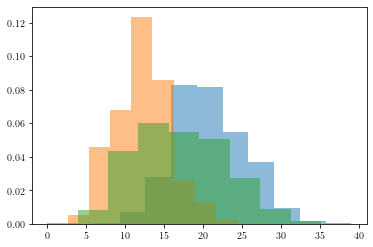

In [21]:
plt.hist(kY, density=True, alpha = 0.5)
plt.hist(kO, density=True, alpha = 0.5)
plt.hist(k,  density=True, alpha = 0.5)

plt.savefig("Degree_distribution.pdf", bbox_inches='tight')

plt.show()